<a href="https://colab.research.google.com/github/zaeyonz/Fashion_MNIST/blob/main/Newron_Network_Model_Training(Tensorflow%2C_Keras_API%2C_Dropout%2C_Callback).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***손실 곡선***
- fit() 메서드를 실행하면 마지막 라인의 실행결과를 자동으로 출력함
- 이것은 fit() 메서드가 무엇인가 반환한다는 증거임
- fit() 메서드는 History 클래스 객체를 반환함
- ***History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음***

In [1]:
# 패션 MNIST dataset 적재하고 train set, validation set로 나눔

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 간단한 함수 정의 --> 이 함수는 하나의 매개변수를 가짐

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

- if 구문을 제외하면 위 함수는 이전에 만든 것과 동일한 모델을 만듦
- ***if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는것임***

In [3]:
# a_layer 매개변수로 층을 추가하지 않고 model_fn() 함수 호출

model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 이전 절과 동일하게 모델을 훈련하지만 fit() 메서드의 결과를 history 변수에 담기

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

KeyboardInterrupt: ignored

- verbose 매개변수는 훈련과정 출력을 조절함
- 기본값은 1로 에포크마다 진행막대와 함께 손실등의 지표가 출력됨
- 0은 아무것도 출력 되지 않음
- 2는 진행 막대를 빼고 출력됨

In [ ]:
# history 객체에 있는 history 딕셔너리 확인

print(history.history.keys())

- 손실과 정확도가 포함되어 있음
- 케라스는 기본적으로 에포크마다 손실을 계산하므로 손실이 포함됨
- 정확도는 complie() 에서 metrics 매개변수에 accuracy를 추가했기 때문에 포함됨

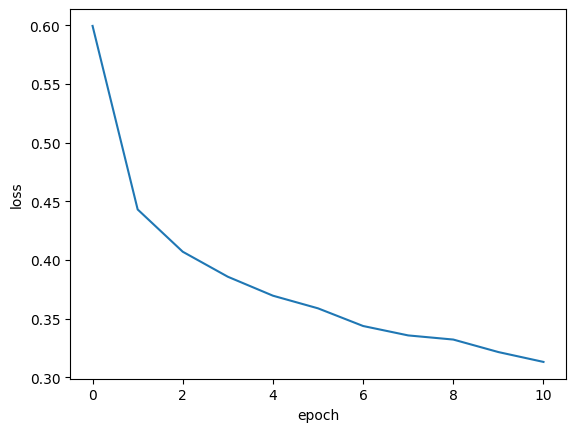

In [9]:
# 손실과 정확도를 이용해 그래프 그리기

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])   # <-- 손실함수 그래프
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

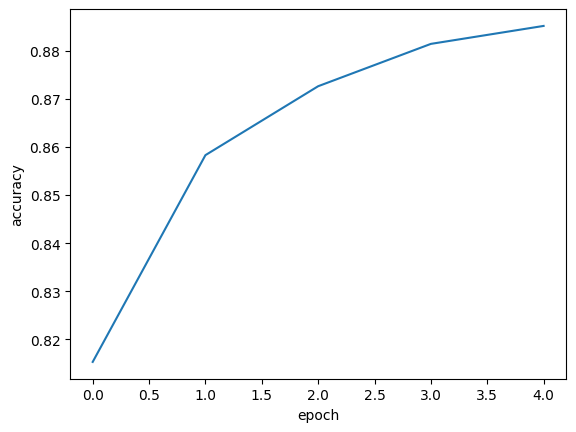

In [ ]:
plt.plot(history.history['accuracy'])       # 정확도 함수
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- ***에포크마다 손실이 감소하고 정확도가 향상함!***

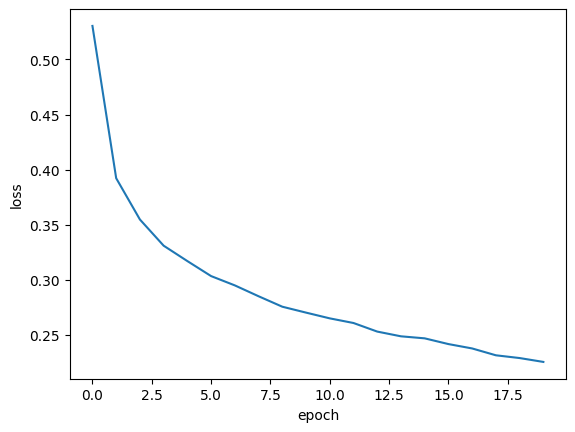

In [ ]:
# 에포크를 20으로 늘리고 손실 그래프를 그림

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# ***검증 손실***
- ***에포크에 따른 과대,과소적합을 파악하려면 train set에 대한 점수뿐만 아니라 validation set에 대한 점수도 필요함***
- ***따라서 위처럼 train set의 손실만 그리면 안됨!!***


- ***에포크마다 검증 손실을 계산하기 위해 fit() 메서드에 검증데이터를 전달할 수 있음!!!***

In [ ]:
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [ ]:
# 반환된 history.history 딕셔너리에 어떤 값이 있는지 키 확인

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


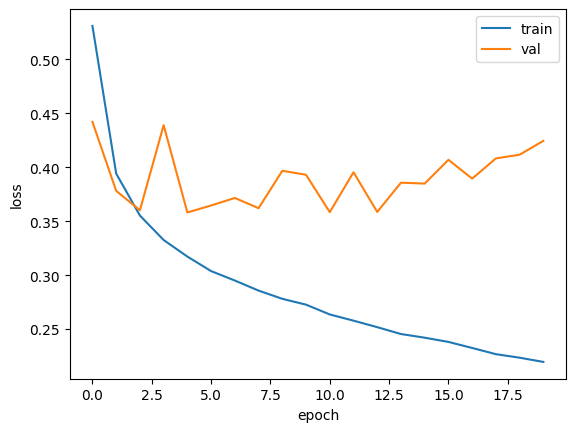

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 일정 에포크가 지나면 서서히 val_loss가 증가하는 추세를 보임
- 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적함 모델이 만들어짐
- ***검증 손실이 상승하는 시점을 뒤로 늦추면 validation set에 대한 loss가 줄어들 뿐만 아니라 validation set에 대한 정확도도 증가할것임***


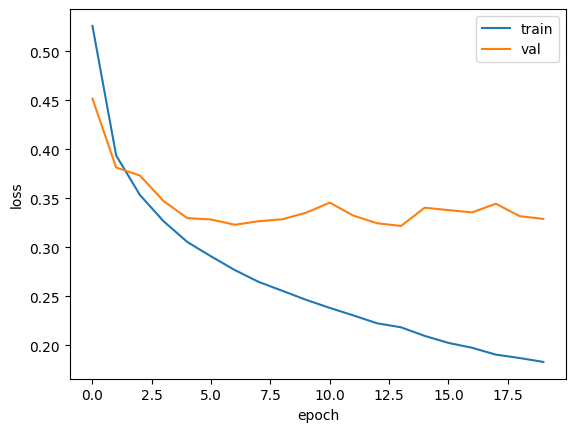

In [ ]:
# 옵티마이저 하이퍼파라미터를 조정하여 과대적합을 완화시킴 --> RMSprop도 잘 작동하지만 Adam을 사용해봄

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 과대적합이 많이 줄었음!!
- val_loss 그래프에 요동이 남아있지만 열 번째 에포크까진 전반적인 감소추세가 이어짐
- ***이는 Adam 옵티마이저가 이 데이터셋에 잘 맞는다는 뜻임!***

# ***Dropout (드롭아웃)***
- 이 방식은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 껴서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막음
- 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 개인이 정해야 할지는 정해야할 하이퍼 파라미터임
- ***이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음***
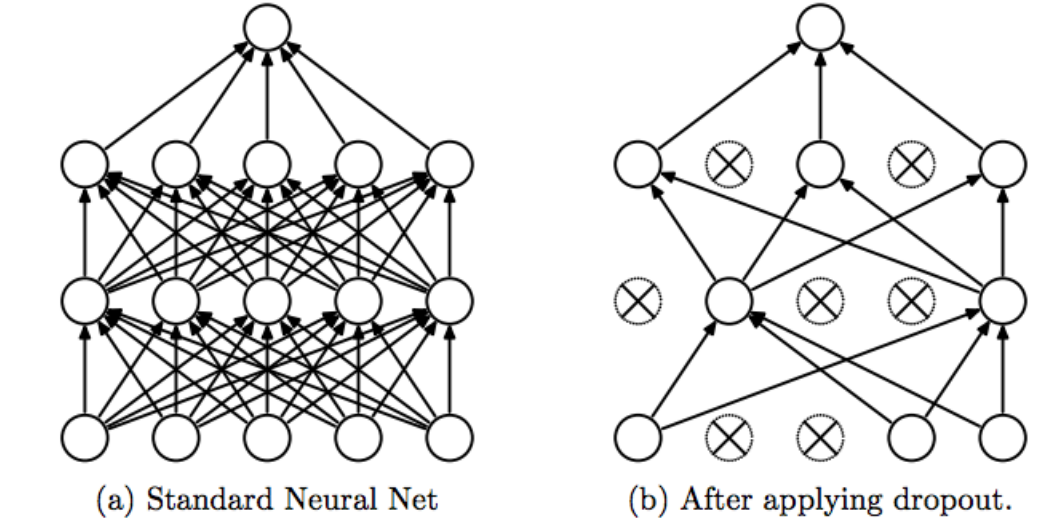

- ***또한 드롭아웃을 적용하여 훈련하는 것은 마치 여러개의 신경망을 앙상블 하는 것 처럼 상상할 수 있음!!***
- 어떤 층 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
- 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [ ]:
# model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가함 --> 30% 정도 드롭아웃

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 함!
- *** 텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않음!!***

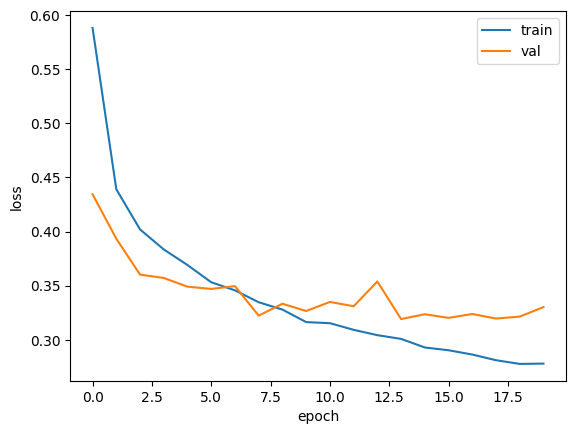

In [ ]:
# 훈련 손실과 검증 손실의 그래프를 그림

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 과대적합이 확실히 줄었음!
- 10번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지됨!
- 이 모델은 20번의 에포크 동안 훈련을 했기 때문에 다소 과대 적합이 되어있음!
- ***따라서 에포크 횟수를 줄여 10으로 하고 다시 훈련함!***

# ***모델 저장과 복원***


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

- keras 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공함

In [ ]:
# 모델 파라미터 저장

model.save_weights('model-weights.h5')

- ***또한 모델 구조와 모델 파라미터를 저장하는 save() 메서드도 제공함***

In [ ]:
# 모델 구조와 파라미터 동시에 저장

model.save('model-whole.h5')

In [ ]:
# 파일 저장 확인

!ls -al *.h5

-rw-r--r-- 1 root root 333320 Aug 28 14:15 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug 28 14:16 model-whole.h5


In [ ]:
# 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')                  # --> save_weight() 와 쌍을 이루는 load_weights() 메서드임

In [ ]:
# 모델의 검증 정확도 확인 --> predict() 사용 , 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플개수가 12000개이므로 predict() 메서드는 (12000,10) 크기의 배열을 반환

import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)          # predict() 메서드 경과에서 가장 큰 값을 고르기 위해 argmax()를 사용함 --> 이 함수는 배열에서 가장 큰 값의 인덱스를 반환함
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.886


In [ ]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력

model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.8860


[0.3198263645172119, 0.8859999775886536]

- 같은 모델을 저장하고 다시 불러들였기 때문에 위와 동일한 정확도를 얻음

# ***콜백 (callback)***
- 콜백(Callback)은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스 들임
- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용함
- ***ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장함***
- ***svae_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음***

In [5]:
# 저장된 파일 이름을 'best-model.h5'로 지정하여 콜백을 적용

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

- model_fn() 함수로 모델을 만들고 compile()로 호출하는 것은 이전과 동일
- ***ModelCheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변수에 리스트로 감싸서 전달함!***

In [6]:
# load_model() 함수로 다시 읽어서 예측 수행

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3162 - accuracy: 0.8879


[0.31623575091362, 0.8879166841506958]

# ***조기 종료 (Early Stopping)***
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 말하며 딥러닝 분야에서 널리 사용함
- 조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할수도 있음
- ***keras에는 조기 종료를 위한 EarlyStopping 콜백을 제공함***
- ***patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정함***

In [7]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)               # 체크포인트 객체 생성
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)            # 조기 종료 객체 생성

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])       # callbacks 매개변수에 체크포인트, 조기종료 객체를 리스트로 전달

- 훈련을 마치고 나면 몇 번째 에포크에서 훈련이 중지되었는지 early_stopping_cb 객체의 stopped_epoch 속성에서 확인 가능

In [8]:
print(early_stopping_cb.stopped_epoch)

10


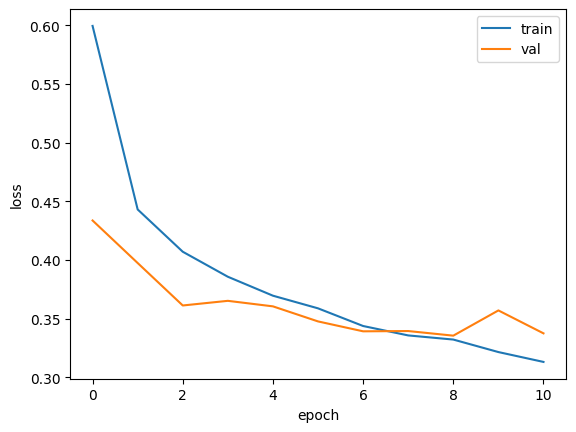

In [10]:
# 훈련 손실과 검증 손실 출력

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능을 확인

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8781


[0.3355295956134796, 0.878083348274231]